In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from dotenv import load_dotenv
from pandas.plotting import parallel_coordinates

import os
import glob
import pandas as pd
import json

from utils.db_tools import get_db, filter_df, make_animation, get_data, metrics_grid, plot_grid
from utils.classify import classify_trajectories

In [3]:
model = "bruss"
run_id = "abd_big"
load_dotenv()
data_dir = os.getenv("DATA_DIR")
output_dir = os.getenv("OUT_DIR")
df = pd.read_csv(f"{output_dir}/{model}/{run_id}/classif_metrics.csv", index_col=0)
df = classify_trajectories(df, steady_threshold=1, osc_threshold=1, dev_threshold=1)
df.value_counts("category")

# # Sample four points from each category
# sampled_df = df.groupby('category').apply(lambda x: x.sample(n=10, replace=True)).reset_index(drop=True)

# # Plot the sampled points in the parameter space
# sns.pairplot(sampled_df, hue='category', vars=['A', 'B', 'Du', 'Dv'])
# plt.show()

category
interesting_behavior    2496
steady_state            1104
Name: count, dtype: int64

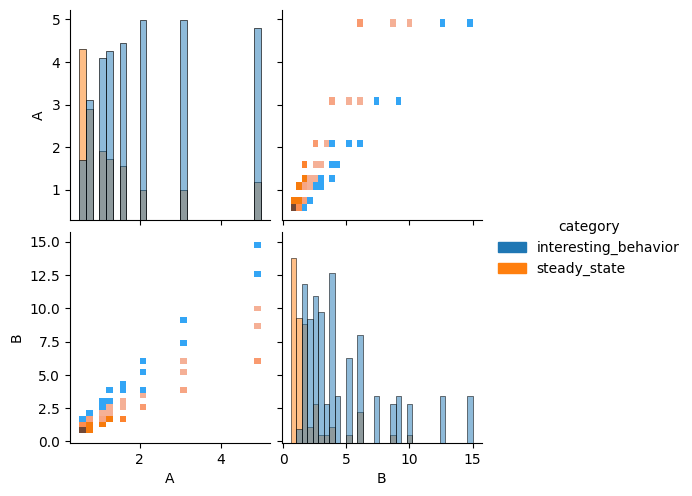

In [15]:
sns.pairplot(df, hue='category', vars=['A', 'B'], kind='hist')
plt.show()

In [20]:
filter_df(df, 1, 1.25).value_counts("category")

category
steady_state    90
Name: count, dtype: int64